# Python Data Analysis

## A bit of context ...

The dataset considered in this project describe 120 years of olympic games, including all the Games from Athens 1896 to Rio 2016. The data contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:
+ `ID` - Unique number for each athlete
+ `Name` - Athlete's name
+ `Sex` - M or F
+ `Age` - Integer
+ `Height` - In centimeters
+ `Weight` - In kilograms
+ `Team` - Team name
+ `NOC` - National Olympic Committee (3-letter code)
+ `Games` - Year and season
+ `Year` - Integer
+ `Season` - Summer or Winter
+ `City` - Host city
+ `Sport` - Sport
+ `Event` - Event
+ `Medal` - Gold, Silver, Bronze, or NA

The goal of this project is to explore these data from different points of view, in order to isolate some tendencies. In the last part of the projet, we will try to build a predictive model based on these data.

## Packages importation and data

### Import the usual packages

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as optimize
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### Import the data

The data file can be found in `lecture-python/data` directory and is called `athlete_events.csv`. This file in the csv format. Create a pandas dataframe `df` from the csv file, and print the first 5 rows of the data.

In [2]:
path = "athlete_events.csv"
df = pd.read_csv(path)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. Data exploration

**1.1 Basic quantities.** The first step to get familiar with the dataset is to look at basic quantities. Please provide:
 1. List of years with olympic games
 1. number of countries, defined as a unique National Olympic Commitee identifier (NOC), over the entire period
 1. number of sports over the entire period
 1. number of sport for each season, over the entire period
 1. fraction of male and female over the entire period

1. List of years:

In [3]:
# list of the years which had olympic games
# removing all duplicates 
years_list = df['Year'].drop_duplicates()

# the list of the years is sorted from old to new
years_list.sort_values(inplace=True)
# resetting the index of the dataFrame
years_list.reset_index(drop = True, inplace = True)

print(years_list)

0     1896
1     1900
2     1904
3     1906
4     1908
5     1912
6     1920
7     1924
8     1928
9     1932
10    1936
11    1948
12    1952
13    1956
14    1960
15    1964
16    1968
17    1972
18    1976
19    1980
20    1984
21    1988
22    1992
23    1994
24    1996
25    1998
26    2000
27    2002
28    2004
29    2006
30    2008
31    2010
32    2012
33    2014
34    2016
Name: Year, dtype: int64


2. number of countries, defined as a unique National Olympic Commitee identifier :

In [4]:
# Collecting all the countries from the NOC collumn and removing all duplicates
countries = df['NOC'].drop_duplicates()
print(f'Number of countries : {len(countries)}')

Number of countries : 230


3. number of sports over the entire period

In [5]:
# Collecting all the sports from the Sport collumn and removing all duplicates
sports = df['Sport'].drop_duplicates()
print(f'Number of sports : {len(sports)}')

Number of sports : 66


4. number of sport for each season, over the entire period

In [67]:
#Number of Sports by Season
ssn_sprt_df = df[['Season','Sport']].drop_duplicates()
num_sprt_by_season = ssn_sprt_df.groupby('Season')['Sport'].count().reset_index(name = 'Number of Sports')
num_sprt_by_season

,Season,Number of Sports
0,Summer,52
1,Winter,17


5. fraction of male and female over the entire period

a. Creating a function that calculates the fraction :

In [7]:
def calc_frac(count, tot) -> float:
    '''
    Calculate the fraction in % of a given data
    
    Parameters:
    -----------
    count: the count of a given data
    tot: the total number of instances to be compared to
    -----------
    
    Return:
    -------
    float: fraction in %
    '''
    
    return (count / tot) * 100

b. Calculating the fraction of male and female over the entire period :

In [8]:
# Getting the number of male annd female participents over the entire period
male_num = len(df.loc[df['Sex'] == 'M'])
female_num = len(df.loc[df['Sex'] == 'F'])
# Calculating the fraction of male and female
m_frac = calc_frac(male_num, len(df))
f_frac = calc_frac(female_num, len(df))
# Printing the result
print(f'Male fraction = {m_frac:.2f}%')
print(f'Female fraction = {f_frac:.2f}%')

Male fraction = 72.51%
Female fraction = 27.49%


**1.2 Biological data.** A first point of view to explore these data could be to focus on biological caracteristics of athletes. In that purpose, produce the following plots:

 1. Weight *v.s.* height *v.s.* age for both men and women (best graphical representation to be chosen)
 1. Height *v.s* time for both men and women
 1. Weight *v.s* time for both men and women
 1. Age *v.s* time for both men and women

What do you observe for the last 3 points? How can you explain this observation?

1. Weight *v.s.* height *v.s.* age for both men and women (best graphical representation to be chosen)

In [9]:
# filtering Men and Women data
men_data = df.loc[df['Sex'] == 'M'][['Age', 'Weight', 'Height']].drop_duplicates().dropna().reset_index(drop = True)
wom_data = df.loc[df['Sex'] == 'F'][['Age', 'Weight', 'Height']].drop_duplicates().dropna().reset_index(drop = True)

Weight vs Height vs Age for Male :

Text(0, 0.5, 'Height')

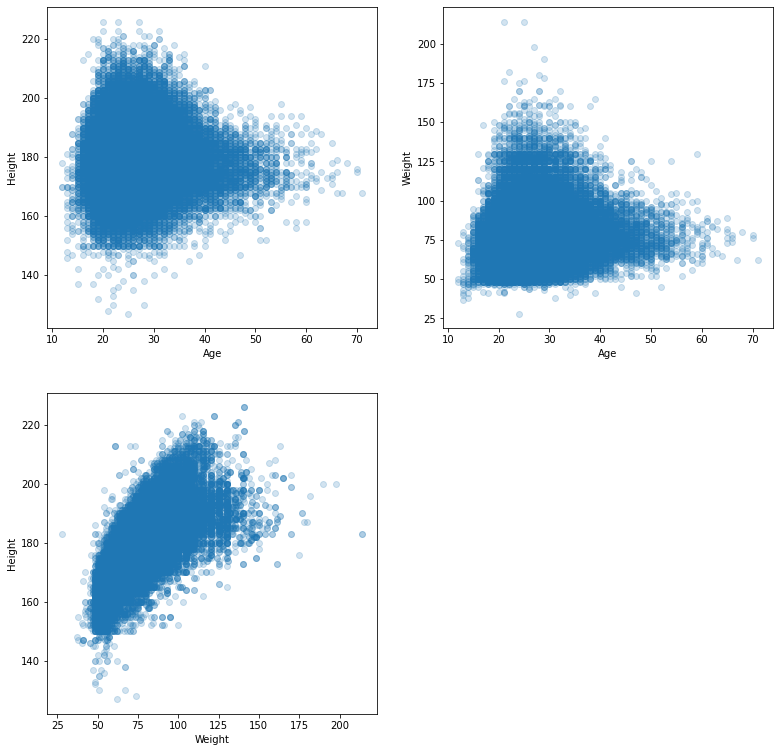

In [10]:
plt.figure(figsize=(13,13))
plt.subplot(221)
plt.plot(men_data['Age'], men_data['Height'], 'o', alpha = 0.2)
plt.xlabel('Age')
plt.ylabel('Height')
plt.subplot(222)
plt.plot(men_data['Age'], men_data['Weight'], 'o', alpha = 0.2)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.subplot(223)
plt.plot(men_data['Weight'], men_data['Height'], 'o', alpha = 0.2)
plt.xlabel('Weight')
plt.ylabel('Height')

Weight vs Height vs Age for Female :

Text(0.5, 1.0, 'Height vs Weight')

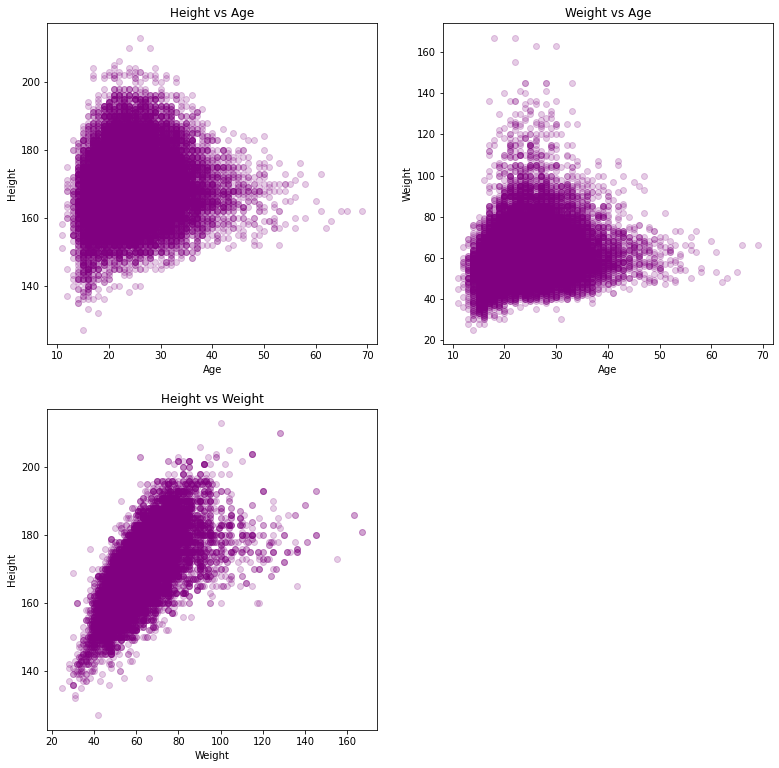

In [11]:
plt.figure(figsize=(13,13))
plt.subplot(221)
plt.plot(wom_data['Age'], wom_data['Height'], 'o', color= 'purple', alpha = 0.2)
plt.xlabel('Age')
plt.ylabel('Height')
plt.title('Height vs Age')
plt.subplot(222)
plt.plot(wom_data['Age'], wom_data['Weight'], 'o', color= 'purple', alpha = 0.2)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Weight vs Age')
plt.subplot(223)
plt.plot(wom_data['Weight'], wom_data['Height'], 'o', color= 'purple', alpha = 0.2)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')

We notice a positive correlation between the Height and the Weight for both Male and Female

2. Height *v.s* time for both men and women

In [12]:
men_data_2 = df.loc[df['Sex'] == 'M'][['Year', 'Height', 'Weight', 'Age']].drop_duplicates().dropna()
wom_data_2 = df.loc[df['Sex'] == 'F'][['Year', 'Height', 'Weight', 'Age']].drop_duplicates().dropna()

Text(0.5, 1.0, 'Height vs time for Female')

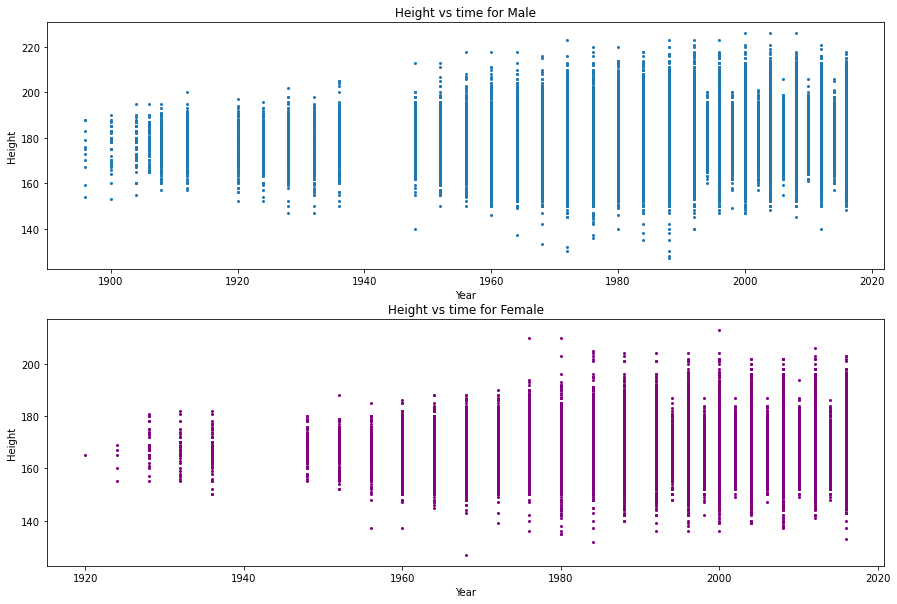

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(men_data_2['Year'], men_data_2['Height'], 'o', markersize=2)
plt.xlabel('Year')
plt.ylabel('Height')
plt.title('Height vs time for Male')
plt.subplot(212)
plt.plot(wom_data_2['Year'], wom_data_2['Height'], 'o', markersize=2, color='purple')
plt.xlabel('Year')
plt.ylabel('Height')
plt.title('Height vs time for Female')

3. Weight *v.s* time for both men and women

Text(0.5, 1.0, 'Weight vs time for Female')

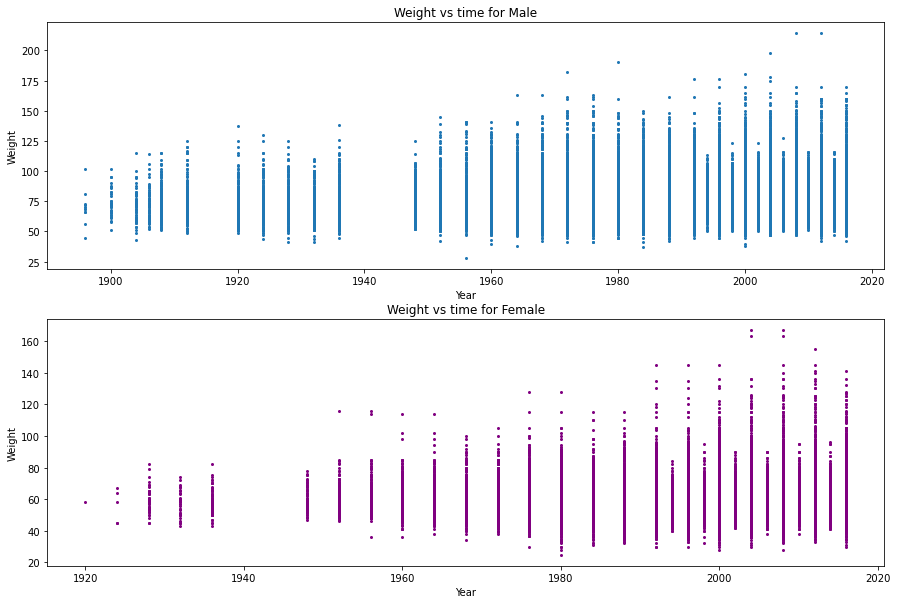

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(men_data_2['Year'], men_data_2['Weight'], 'o', markersize=2)
plt.xlabel('Year')
plt.ylabel('Weight')
plt.title('Weight vs time for Male')
plt.subplot(212)
plt.plot(wom_data_2['Year'], wom_data_2['Weight'], 'o', markersize=2, color='purple')
plt.xlabel('Year')
plt.ylabel('Weight')
plt.title('Weight vs time for Female')

4. Age *v.s* time for both men and women

Text(0.5, 1.0, 'Age vs time for Female')

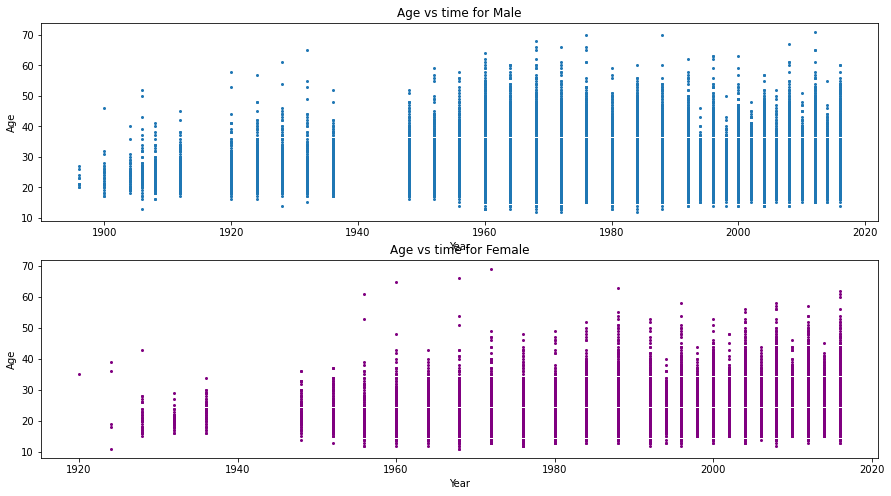

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(men_data_2['Year'], men_data_2['Age'], 'o', markersize=2)
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Age vs time for Male')
plt.subplot(212)
plt.plot(wom_data_2['Year'], wom_data_2['Age'], 'o', markersize=2, color='purple')
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Age vs time for Female')

Last 3 point :

From the last three plots :
1. Height v.s time for both men and women
1. Weight v.s time for both men and women
1. Age v.s time for both men and women

We notice that in the last years the participents are more diversified, and that's mainly due to the fact that we have more and more participents espetially after WW2 when the quality of life throughout the world started improving and people were starting to have the opportunity in following and athletic carrier.

as we can see from the Height v.s time & Weight v.s time there are more people of different Heights and Weight participating in the Olypics
We also notice from the Age v.s time that older people are are participating in the games.

We can also notice throughout all plots that the female participents are more present in the last years then say in the 1930s

One last point that's worth mentioning is that we can notice a gape somewhere in the late 1930s to early 1950s range, the reason behind it is that there were no olypic games held in that period because the world was in war (WW2)

**1.3 Parity data.** One can also look how the presence of women in Olympic Games evovled with time. To address this question, please produce the following plots:

 1. fraction male/female as function of time
 1. fraction of male/female, for each sport for 2014, and 2016 separately

1. fraction male/female as function of time

In [16]:
# count the number of Male & Female participents yearly
# counting using unique IDs
mw_yearly = df.groupby(['Sex', 'Year'])['ID'].count()
# the total number of participents yearly
tot_yearly = mw_yearly['M'] + mw_yearly['F']
# calculate the fractions of Male & Female yearly using the calc_frac function defined eirlier
# returns a pd Series with indexes: ('F/M', 'Year') values: fractions
mw_yearly_frac = mw_yearly.pipe(calc_frac, tot_yearly)

Plotting the fraction of male & female through the years

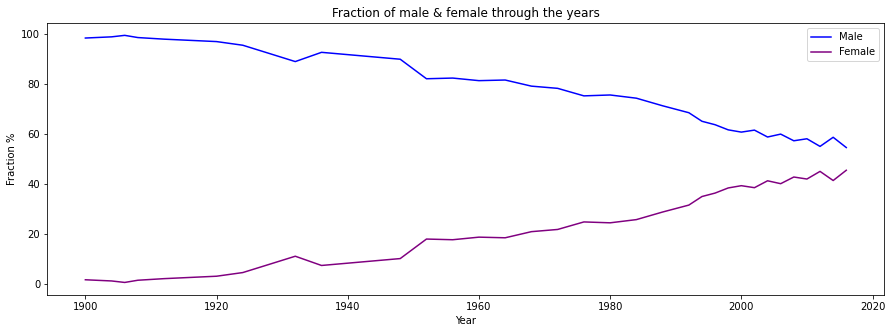

In [17]:
# Plotting 
plt.figure(figsize = (15,5))
mw_yearly_frac['M'].plot(color="blue", label='Male')
mw_yearly_frac['F'].plot(color="purple", label='Female')
plt.ylabel('Fraction %')
plt.title('Fraction of male & female through the years')
plt.legend();

2. fraction of male/female, for each sport for 2014, and 2016 separately

For ease of use, we first start by defining a function that calculates the fraction of M & F by sport for a given year :

In [18]:
def calc_frac_by_sport(df, year: int):
    '''
    Calculate the fractions of male/female for each sport for a given year
    
    Parameters
    ----------
    df: the dataFrame that contains all the data
    year: the year for which the fractions should be calculated
    
    Return
    ------
    pd.Series: a series that contains all the fractions for each sport by sex
    '''
    
    # Filtering the data
    df_y = df.loc[(df['Year'] == year)] 
    # Counting the number of Male & Female for each sport
    mw_by_sport = df_y.groupby(['Sex','Sport'])['ID'].count()
    # Total number of participents by sport (M + F)
    tot_by_sport = mw_by_sport['M'] + mw_by_sport['F']
    # Calculating the fraction of M & F by sport
    mw_by_sport_frac = mw_by_sport.pipe(calc_frac, tot_by_sport)
    return mw_by_sport_frac

We calculate the fraction of M & F for the years 2014 & 2016 using `calc_frac_by_sport()`

In [19]:
# for 2014
mw_by_sport_frac_14 = calc_frac_by_sport(df, 2014)
# for 2016
mw_by_sport_frac_16 = calc_frac_by_sport(df, 2016)

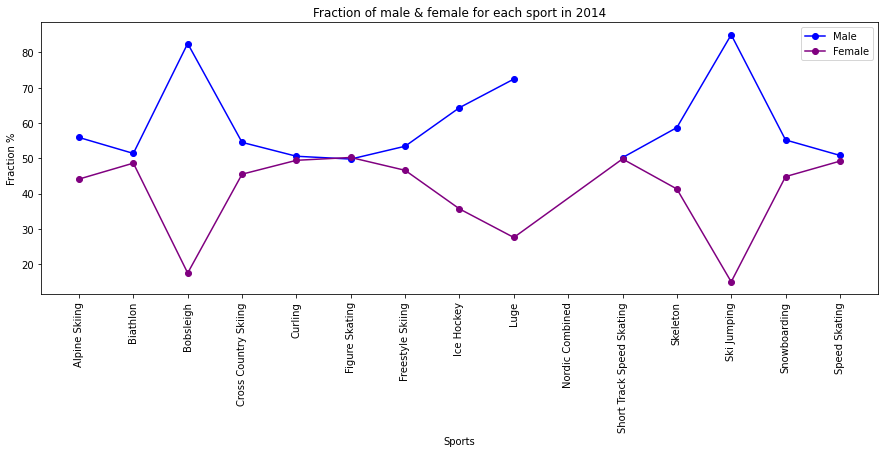

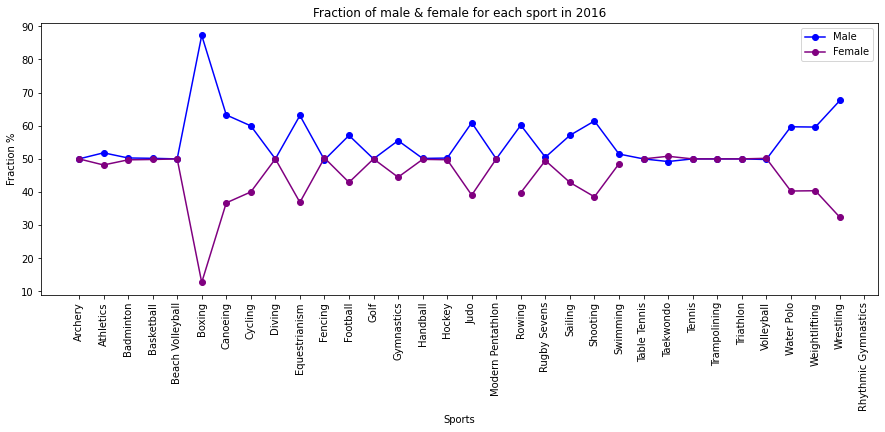

In [20]:
# Plot 2014
plt.figure(figsize = (15,5))
plt.plot(mw_by_sport_frac_14['M'].index, mw_by_sport_frac_14['M'].values, 'o-', color='blue', label='Male')
plt.plot(mw_by_sport_frac_14['F'].index, mw_by_sport_frac_14['F'].values, 'o-', color='purple', label='Female')
plt.title('Fraction of male & female for each sport in 2014')
plt.xlabel('Sports')
plt.xticks(rotation=90) # rotate the x labels
plt.ylabel('Fraction %')
plt.legend()

# Plot 2016
plt.figure(figsize = (15,5))
plt.plot(mw_by_sport_frac_16['M'].index, mw_by_sport_frac_16['M'].values, 'o-', color='blue', label='Male')
plt.plot(mw_by_sport_frac_16['F'].index, mw_by_sport_frac_16['F'].values, 'o-', color='purple', label='Female') 
plt.title('Fraction of male & female for each sport in 2016')
plt.xlabel('Sports')
plt.xticks(rotation=90)
plt.ylabel('Fraction %')
plt.legend();

We notice that there are some missing values (points), those points correspond to sports that either have Male only participents that year or Female only.

In the Series of fraction they correspond to NaN values, that are due to the fact that a fraction can not be calculated if we don't have the info on the number of participents of the oposite sex for that game since it's not even listed when we grouped by sport and sex.

For example we take 2014 Series and we notice that *Nordic Combined* has only Male participent and no female thus it's not even listed under the 'F' female group.

In [21]:
mw_by_sport_frac_14['M'].index[~mw_by_sport_frac_14['M'].index.isin(mw_by_sport_frac_14['F'].index)][0]

'Nordic Combined'

We can do the same for the 2016 series and we find *Rhythmic Gymnastics* & *Synchronized Swimming* that have only Female participents :

In [22]:
mw_by_sport_frac_16['F'].index[~mw_by_sport_frac_16['F'].index.isin(mw_by_sport_frac_16['M'].index)]

Index(['Rhythmic Gymnastics', 'Synchronized Swimming'], dtype='object', name='Sport')

A way to contourn this would be to check for missing sports in those series between M and F and add them with a value of 0 participents before calculating the fraction.

**1.4. Medals.** In order to have a better overview of game winners, one can explore how the gold, silver and bronze medals are distributed accross countries, sport, etc ... Produce the following plots:

 1. Histogram of medal type accross all athelete-events
 1. Which sport has more medals? Does it change with time?
 1. Number of countries versus time? gold/silver/bronze for each across countries? does it change with time?
 
*HINT:* it may be useful to create categorical variable assicated to the type of won medal.

1. Histogram of medal type accross all athelete-events

In [23]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


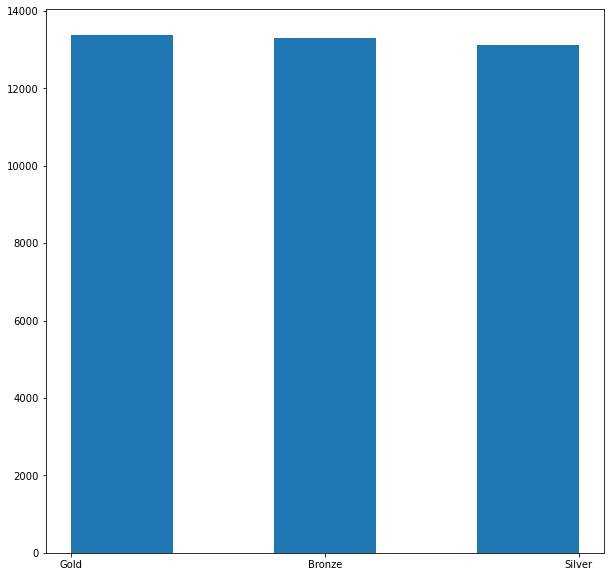

In [24]:
medals = df['Medal'].dropna()
plt.figure(figsize = (10,10))
plt.hist(medals, bins=5);

2. Which sport has more medals? Does it change with time?

Finding the sport that won the most medals all time :

In [25]:
# getting all the sports with the number of medals won in it
medals_by_sport = df.groupby('Sport')['Medal'].count()
# getting the sport's name that correspend to the max number of medals won
sport_most_medals = medals_by_sport[medals_by_sport == medals_by_sport.max()].index[0]
print(f'The sport that has the most modals all time is : {sport_most_medals}')

The sport that has the most modals all time is : Athletics


Finding the sport that won the most modals each year :

In [26]:
# Getting the number of medals won in each sport every year
medals_by_sport_yearly = df.groupby(['Year', 'Sport'])['Medal'].count().reset_index(name='Num of Medals')
# Getting the ids of the rows with the biggest number of medals won each year
max_medals_yearly_ids = medals_by_sport_yearly.groupby('Year')['Num of Medals'].idxmax().values
# Getting the sports that had the most medals for each year by passing the ids intro the previous DataFrame
sports_w_max_medals_yearly = medals_by_sport_yearly.loc[max_medals_yearly_ids]
sports_w_max_medals_yearly.head(10)

,Year,Sport,Num of Medals
0,1896,Athletics,37
23,1900,Sailing,105
30,1904,Athletics,79
53,1906,Rowing,107
78,1908,Shooting,114
91,1912,Gymnastics,198
111,1920,Gymnastics,198
128,1924,Athletics,129
157,1928,Athletics,108
183,1932,Athletics,114


Making a Pie Chart for all the sports above and the frequency of it having the most medals throughout the years :

In [27]:
# The number of years each sport had won the 'Most Medals this year' title
sports_most_medals_each_year = sports_w_max_medals_yearly.groupby('Sport')['Num of Medals'].count().reset_index(name = 'Num of Years')
sports_most_medals_each_year

,Sport,Num of Years
0,Athletics,16
1,Gymnastics,2
2,Ice Hockey,6
3,Rowing,3
4,Sailing,1
5,Shooting,1
6,Swimming,6


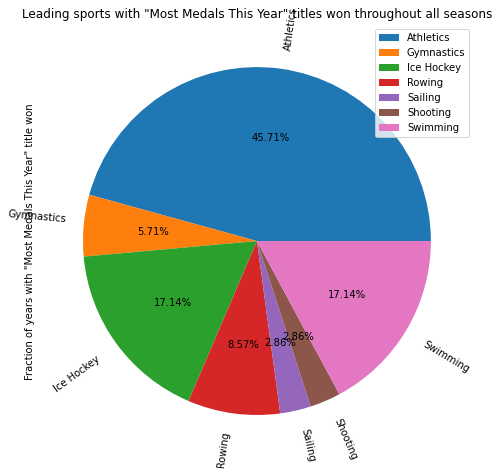

In [28]:
# pie plot 
sports_most_medals_each_year.plot.pie(y = 'Num of Years',
                                      labels = sports_most_medals_each_year['Sport'],
                                      autopct = "%.2f%%",
                                      figsize=(10, 8),
                                      rotatelabels = True,
                                      ylabel = 'Fraction of years with \"Most Medals This Year\" title won', 
                                      title = 'Leading sports with \"Most Medals This Year\" titles won throughout all seasons');

3. Number of countries versus time? gold/silver/bronze for each across countries? does it change with time?

Counting the number of countries participating in the Olympics for each year :

In [29]:
# Number of countries versus time
countries_yearly = df[['Year', 'NOC']].drop_duplicates().groupby(['Year'])['NOC'].count()

Plotting Number of countries Vs Time :

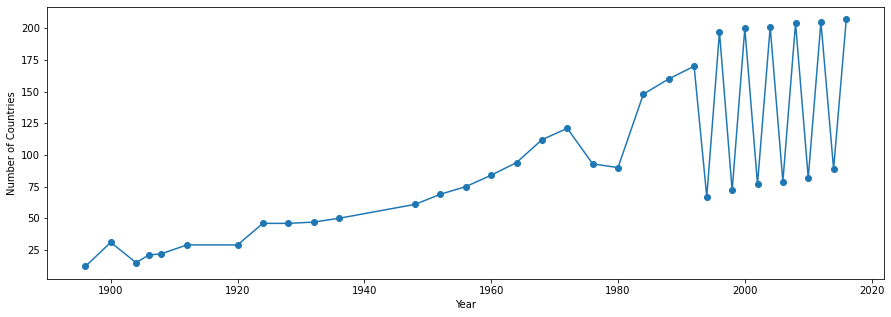

In [30]:
countries_yearly.plot(figsize = (15,5), ylabel = 'Number of Countries', style='o-');

Gold/silver/bronze for each across countries?

In [31]:
# gold/silver/bronze for each country
medals_by_countries = df[['NOC', 'Medal', 'ID']].dropna()
# Counting the number of each medal type won by each country
t_medals_by_countries = medals_by_countries.groupby(['NOC','Medal'])['ID'].count()
# Unstacking the group to get each medal type in it's own column
unstacked_t_medals = t_medals_by_countries.unstack()
# Replacing NaN values by 0 indicating 0 Medals of that type was won by a given country
unstacked_t_medals[unstacked_t_medals.isna()] = 0

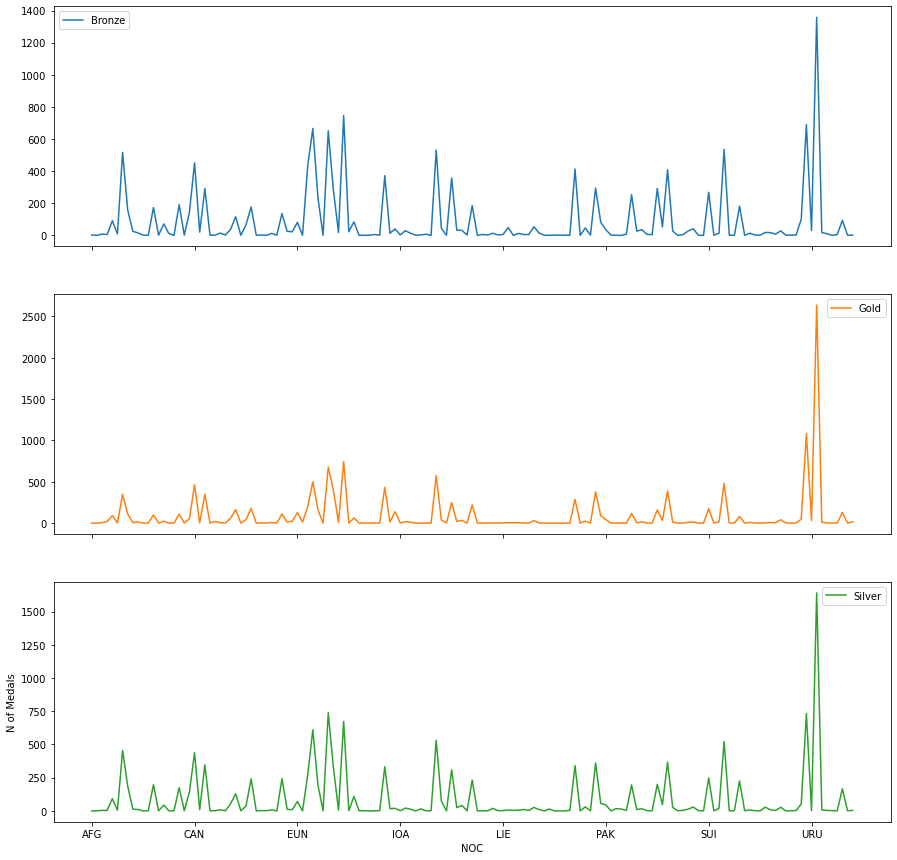

In [32]:
unstacked_t_medals.plot(subplots= True, figsize = (15,15))
plt.ylabel('N of Medals');

## 2. Modelling a 2D correlation

**2.1.** Define analytical function `model_height(weight, *params)` that would well describe the average behaviour of heights *v.s* weights. This function will have some free parameters `*params` to be latter adjusted. 

In [33]:
def model_height(weight, *params):
    '''
    Predicts the height of the athlete based on his weight using a linear regression
    
    Parameters:
    -----------
    weight: The weight of the athlete (either a numerical value or an ndarray of weights for multiple athletes)
    *params: 
        params[:-1]: The sloaps of the linear (polynomial) regression
        params[-1]: The Y-Intercept of the linear regression
    -----------
    
    Returns:
    --------
    height: 
        The predicted height of the athlete (either a numerical value or an ndarray of heights for multiple athletes)
    --------
    '''
    
    # product of all sloaps with the Xs : a0*Xs**(n), a1*Xs**(n-1), a2*Xs**(n-2), ..., b 
    prod_l = []
    # n is the order of the polynomial regression (if n=1 it's just a simple linear regression) 
    for n in range(len(params)-1, -1, -1): 
        # multiplying each parameter with all the values of Xs**(n)
        prod_l.append(np.multiply.outer(params[-n-1], weight**n))
    prod = np.asarray(prod_l) # transforming the result into a 2 dimentional numpy array
    # summing the product as a polynome : a0*Xs**(n) + a1*Xs**(n-1) + a2*Xs**(n-2) + ... + b
    return np.sum(prod, axis= 0)

**2.2.** Define bins of weights, for each bin compute the averaged weight and the average height. Store them into two arrays, `meanW` and `meanH`.

In [34]:
# Create a new sub dataframe of Heights and Weights
wh_data = df[['Weight', 'Height']].drop_duplicates().dropna().reset_index(drop = True)

In [35]:
# Cutting the Weight values into 50 bins and storing them in a new column 'W_bins'
wh_data['W_bins'] = pd.qcut(wh_data['Weight'], 50, duplicates = 'drop')
# Calculating the Weight Mean and The Height Mean for those bins
meanW, meanH = wh_data.groupby('W_bins')['Weight'].mean().values, wh_data.groupby('W_bins')['Height'].mean().values

**2.3.** Define a cost function of your choice, quantifiying the difference between the function predicting the average heights and the observed average heights, for all weights.

In [36]:
def calc_coast(params, weights, heights):
    '''
    Calculate cost function as the Root Mean Squared Error (RMSE) between the predicted and the true value
    
    Parameters:
    -----------
    params: Linear (Polynomial) Regression parameters (sloaps and Y-intercept)
    weights: ndarray of the weights used to calculate predicted values of heights
    heights: ndarray of the heights (observed values)
    -----------
    
    Returns:
    -------
    float: The coast function
    '''
    # Array of the predicted values
    predict = model_height(weights, *params)
    # Array of the observed values (true values)
    observ = heights
    return np.sum((observ - predict)**2)/len(predict)

**2.4.** Using `scipy.minimize` function, find set of parameters `*params` that minimize the cost function.

In [37]:
init_guess = [1,1,1] # 3 initial guesses to get 3 regression parameters for a polynomial modal of order 2
minimize_res = optimize.minimize(calc_coast, init_guess, args=(meanW,meanH))
parameters = minimize_res.x
parameters

array([-5.32268290e-03,  1.35835830e+00,  1.06494127e+02])

Calculating the coast function for our model using the parameters we obtained from the Scipy Optimization function 'minimize' :

In [38]:
calc_coast(parameters, meanW, meanH)

1.666053553326978

We notice that the parameters found earlier help us minimise the coast function to an acceptable value of `1.67`

Using the parameters obtained previously to model the mean heights from the mean weights :

In [39]:
meanH_predic = model_height(meanW, *parameters)
meanH_predic

array([147.379949  , 152.36953333, 155.08498205, 157.77183279,
       159.79652336, 161.51150296, 163.13210122, 164.67768954,
       165.83560081, 167.00599828, 168.46059764, 169.88958382,
       170.91439636, 171.91604244, 172.95451441, 173.93524117,
       174.91914295, 175.78748904, 176.96811334, 177.82310841,
       178.64548832, 179.47657311, 180.06706181, 180.85961681,
       181.84573784, 182.54516004, 183.2469301 , 184.13882074,
       184.7812652 , 185.4149416 , 186.01853105, 186.59235744,
       187.32035068, 187.85015109, 188.34410597, 188.97399592,
       189.53857662, 190.05817664, 190.43681014, 190.78370786,
       191.20399039, 191.66564958, 192.08830285, 192.40670258,
       192.76479047, 193.0722426 , 193.15639725, 193.09247361,
       192.52642469, 188.64595472])

**2.5.** Overlay on the same plot: the cloud of points, the computed average and the predicted average. What do you conclude about your choice of analytical function?

Plotting the Observed (True values) meanW & meanH pairs of point, and our predictive model

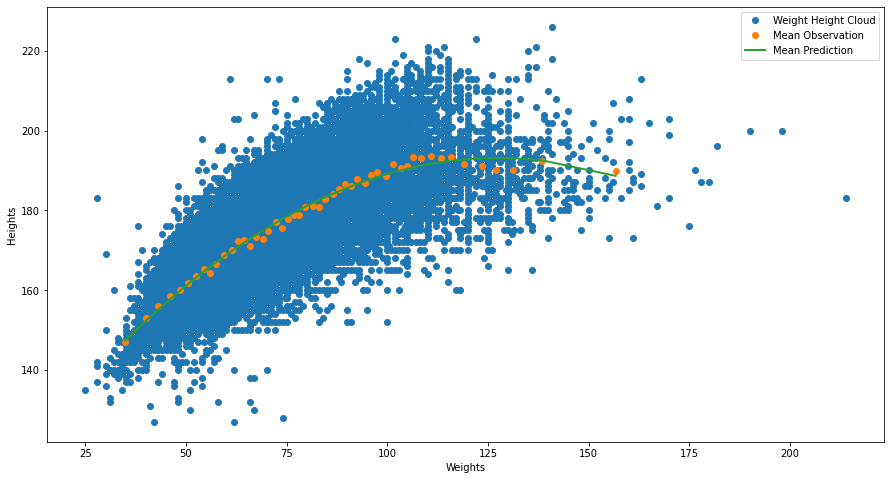

In [40]:
#plot
plt.figure(figsize = (15,8))
plt.plot(wh_data['Weight'], wh_data['Height'], 'o', label = 'Weight Height Cloud')
plt.plot(meanW, meanH, 'o', label = 'Mean Observation')
plt.plot(meanW, meanH_predic, label = 'Mean Prediction', linewidth = 2)
plt.legend()
plt.xlabel('Weights')
plt.ylabel('Heights');

The analytical function chosen was a best attempt to try and modelise the correlation between the Heights and the Weights of the athletes, it tries to reduce to a minimum the residual values between the observed value and the predicted one.

This function still doesn't predict a considerable amount of (weight,hight) pairs that are further away from the fit as can be seen in the plot above

**2.6.** Repeat the exercise with this binning `[25, 75, 125, 250]` and this function $h(x) = p_0 + p_1 x$, just to get a result to be compared with others.

1. binning `[25, 75, 125, 250]`

In [41]:
# Cutting the Weight values into 3 bins and storing them in a new column 'W_bins'
wh_data['W_bins'] = pd.cut(wh_data['Weight'], bins=[25, 75, 125, 250], duplicates = 'drop')
# Calculating the Weight Mean and The Height Mean for those bins
meanW_2, meanH_2 = wh_data.groupby('W_bins')['Weight'].mean().values, wh_data.groupby('W_bins')['Height'].mean().values

In [42]:
meanH_2

array([166.5654321 , 187.54783484, 190.72202166])

2. Minimzing coast func for a simple linear regression $h(x) = p_0 + p_1 x$ :

In [43]:
init_guess = [1,1] # 2 initial guesses to get 2 regression parameters for a linear modal of order 1
minimize_res_2 = optimize.minimize(calc_coast, init_guess, args=(meanW_2,meanH_2))
p_0, p_1 = minimize_res_2.x
minimize_res_2.x

array([  0.29319567, 152.84459969])

3. Plotting Observation, Predictions, and the linear regrassion $h(x)$ :

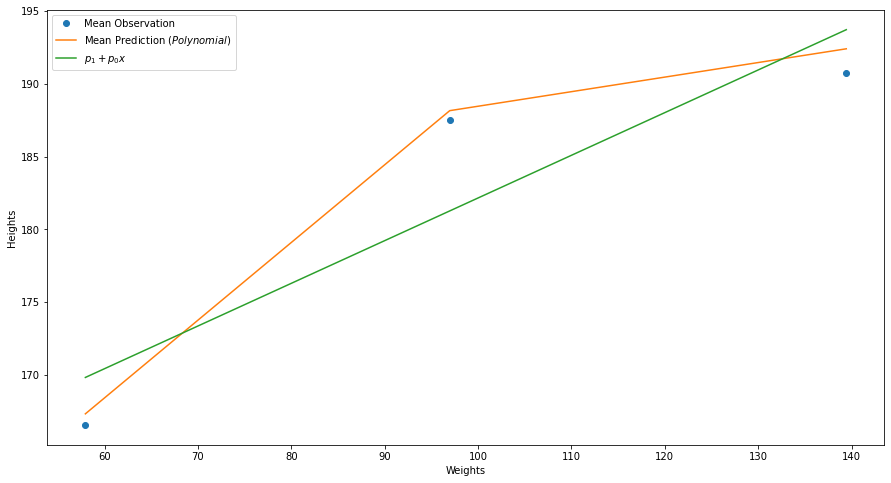

In [44]:
#plot
plt.figure(figsize = (15,8))
plt.plot(meanW_2, meanH_2, 'o', label = 'Mean Observation')
plt.plot(meanW_2, model_height(meanW_2, *parameters), label = 'Mean Prediction $(Polynomial)$')
plt.plot(meanW_2, model_height(meanW_2, p_0, p_1), label = '$p_1 + p_0 x$')
plt.legend()
plt.xlabel('Weights')
plt.ylabel('Heights');

## 3. Toward building a n-dimenstional predictive model

**3.1.** Define two populations, athelete-event with and without a medal, and find and plot few distributions that shows some discriminating power for these two populations.

1. Define two populations, athelete-event with and without a medal, and find and plot few distributions that shows some discriminating power for these two populations.

In [45]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Spliting the dataframe into two populations :
1. Population that won  Medals `df_M`.
1. Population that did not win Medals `df_NM`.

In [46]:
df_M = df[df['Medal'].notna()]
df_NM = df[df['Medal'].isna()]

Before finding different districutions, and for ease of use, let's first start by defining a function `get_athletes_count()` that will take care of getting the number of athletes who (won/did not win) medals by a given criteria (Age/Weight/Height...etc) :

In [47]:
def get_athletes_count(df_M, df_NM, x:str):
    '''
    Get the number of athletes who (won/did not win) medals by a given criteria x
    
    Parameters:
    -----------
    df_M: dataFrame containing only athletes who won medals
    df_NM: dataFrame containing only athletes who did not win medals
    x: the criteria by which the athletes are counted
    
    Returns:
    --------
    group_M: pd.Series containing the count of athletes who won medals
    group_NM: pd.Series containing the count of athletes who did not win medals
    '''
    
    group_M = df_M.groupby(x)['ID'].count()
    group_NM = df_NM.groupby(x)['ID'].count()
    
    return group_M, group_NM

a. Distribution describing the number of person that (won/didn't win) medals Vs the Age :

In [48]:
# finding the number of participant who won/didn't win medals by their age
age_group_M, age_group_NM = get_athletes_count(df_M, df_NM, 'Age')

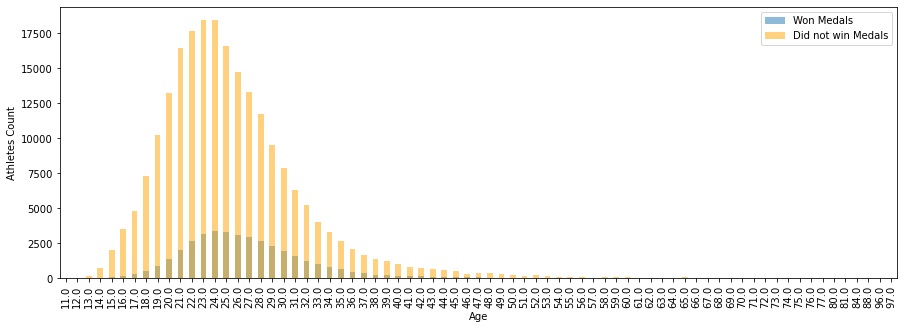

In [49]:
# Plotting distributions
age_group_M.plot(kind='bar', ylabel = 'Athletes Count', figsize=(15,5), label = 'Won Medals', alpha=0.5)
age_group_NM.plot(kind='bar', ylabel = 'Athletes Count', figsize=(15,5), label = 'Did not win Medals', color= 'orange', alpha=0.5)
plt.legend();

b. Distribution describing the number of person that (won/didn't win) medals Vs the Height :

In [50]:
# finding the number of participant who won/didn't win medals by their Height
height_group_M, height_group_NM = get_athletes_count(df_M, df_NM, 'Height')

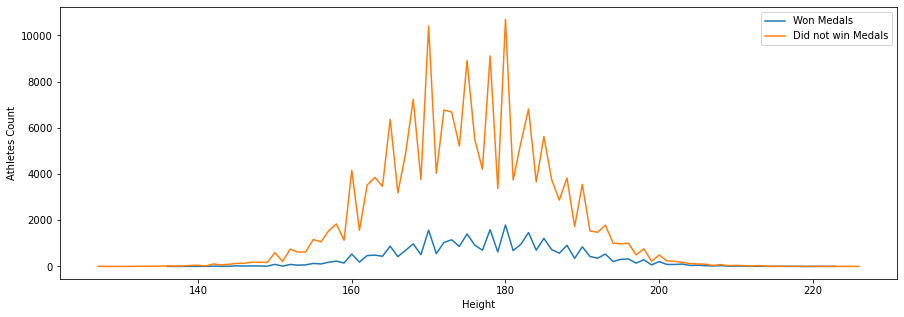

In [51]:
# Plotting distributions
height_group_M.plot(ylabel = 'Athletes Count', figsize=(15,5), label = 'Won Medals')
height_group_NM.plot(ylabel = 'Athletes Count', figsize=(15,5), label = 'Did not win Medals')
plt.legend();

c. Distribution describing the number of person that (won/didn't win) medals Vs the Weight :

In [52]:
# finding the number of participant who won/didn't win medals by their Weight
weight_group_M, weight_group_NM = get_athletes_count(df_M, df_NM, 'Weight')

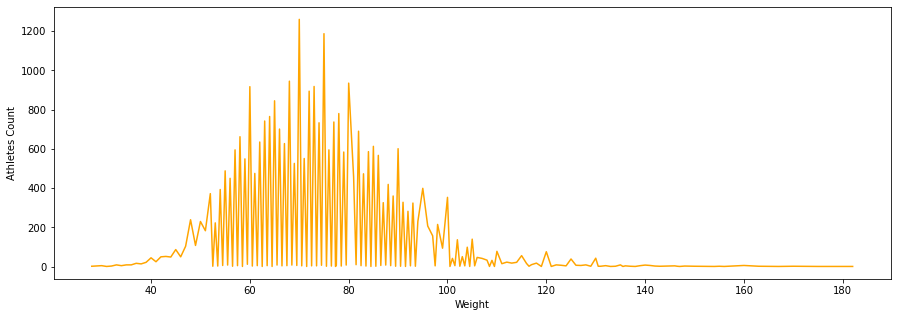

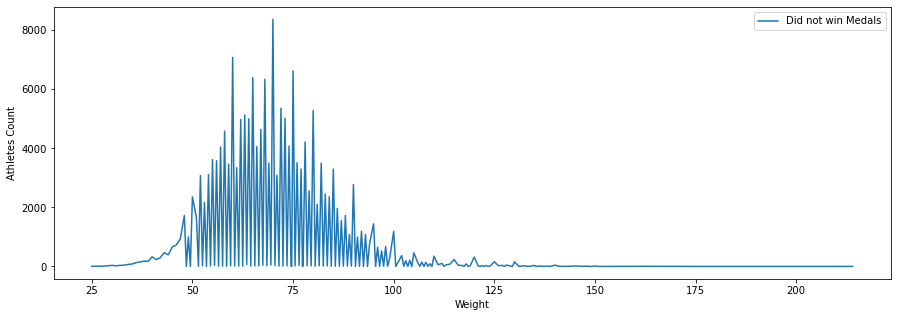

In [53]:
# Plotting distributions
plt.figure()
weight_group_M.plot(ylabel = 'Athletes Count', figsize=(15,5), label = 'Won Medals', color= 'orange')
plt.figure()
weight_group_NM.plot(ylabel = 'Athletes Count', figsize=(15,5), label = 'Did not win Medals')
plt.legend();

d. Distribution describing the number of person that (won/didn't win) medals Vs the Country :

In [54]:
# finding the number of participant who won/didn't win medals by their Country
country_group_M, country_group_NM = get_athletes_count(df_M, df_NM, 'NOC')

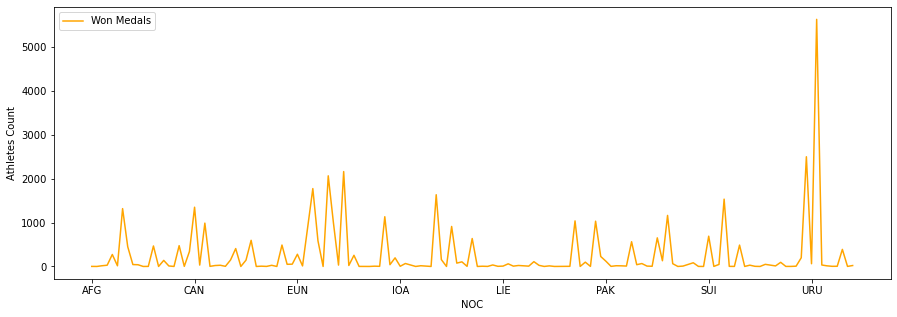

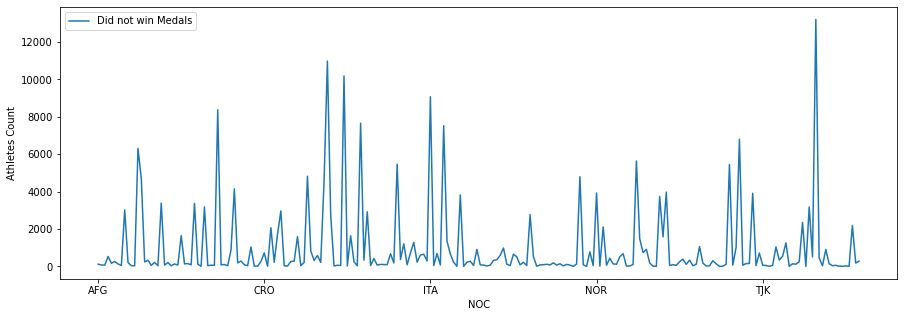

In [55]:
# Plotting distributions
plt.figure()
country_group_M.plot(ylabel = 'Athletes Count', figsize=(15,5), label = 'Won Medals', color='orange')
plt.legend();
plt.figure()
country_group_NM.plot(ylabel = 'Athletes Count', figsize=(15,5), label = 'Did not win Medals')
plt.legend();

e. Distribution describing the number of person that (won/didn't win) medals Vs the Year :

In [56]:
# finding the number of participant who won/didn't win medals by the Year 
year_group_M, year_group_NM = get_athletes_count(df_M, df_NM, 'Year')

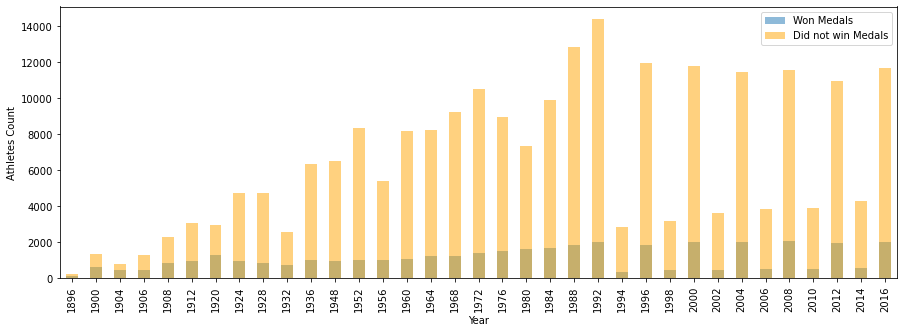

In [57]:
# Plotting distributions
year_group_M.plot(kind='bar', ylabel = 'Athletes Count', figsize=(15,5), label = 'Won Medals', alpha=0.5)
year_group_NM.plot(kind='bar', ylabel = 'Athletes Count', figsize=(15,5), label = 'Did not win Medals', color= 'orange', alpha=0.5)
plt.legend()

f. Distribution describing the number of person that (won/didn't win) medals Vs the Sex :

In [58]:
# finding the number of participant who won/didn't win medals by their Sex
sex_group_M, sex_group_NM = get_athletes_count(df_M, df_NM, 'Sex')

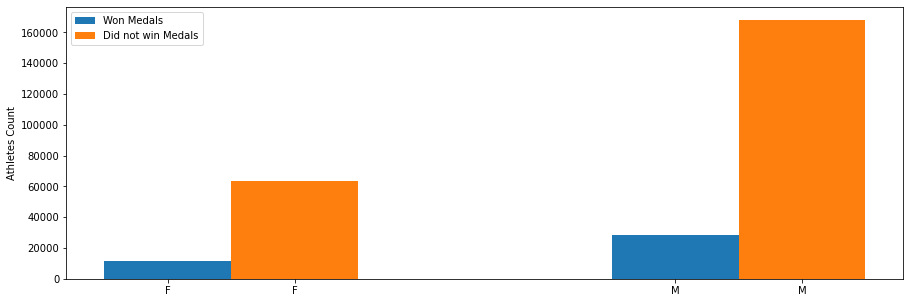

In [59]:
# Plotting distributions
X = np.arange(2) # used to combine the two bar plots

plt.figure(figsize=(15,5))
plt.bar(X , sex_group_M.values, width=0.25, label='Won Medals')
plt.bar(X +0.25, sex_group_NM.values, width=0.25, label='Did not win Medals')
plt.ylabel('Athletes Count')
plt.xticks(np.hstack((X, X+0.25)), labels=['F','M','F','M'])
plt.legend();

g. Distribution describing the number of person that (won/didn't win) medals Vs the Season :

In [60]:
# finding the number of participant who won/didn't win medals by the Season
season_group_M, season_group_NM = get_athletes_count(df_M, df_NM, 'Season')

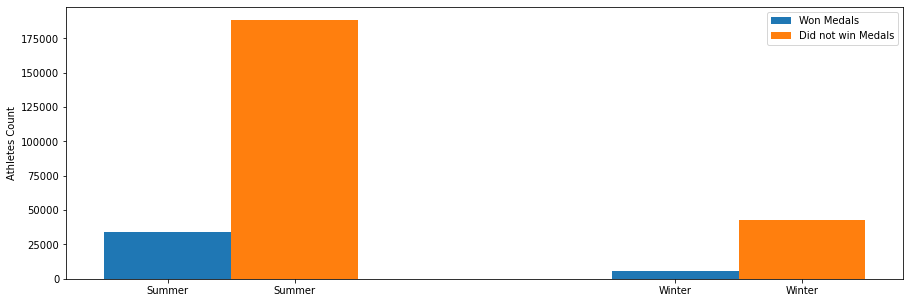

In [61]:
# Plotting distributions
X = np.arange(2) # used to combine the two bar plots

plt.figure(figsize=(15,5))
plt.bar(X , season_group_M.values, width=0.25, label='Won Medals')
plt.bar(X +0.25, season_group_NM.values, width=0.25, label='Did not win Medals')
plt.ylabel('Athletes Count')
plt.xticks(np.hstack((X, X+0.25)), labels=['Summer','Winter','Summer','Winter'])
plt.legend();

h. Distribution describing the number of person that (won/didn't win) medals Vs the Sport :

In [62]:
# finding the number of participant who won/didn't win medals by the Sport
sport_group_M, sport_group_NM = get_athletes_count(df_M, df_NM, 'Sport')

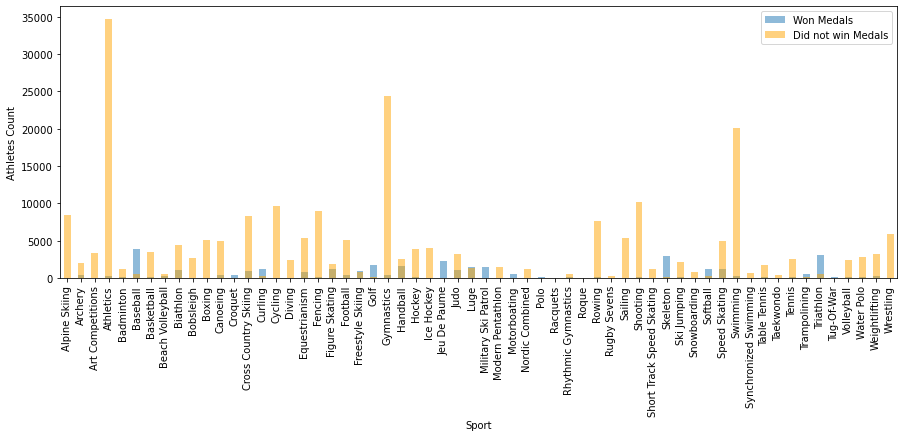

In [63]:
sport_group_M.plot(kind='bar', ylabel = 'Athletes Count', figsize=(15,5), label = 'Won Medals', alpha=0.5)
sport_group_NM.plot(kind='bar', ylabel = 'Athletes Count', figsize=(15,5), label = 'Did not win Medals', color= 'orange', alpha=0.5)
plt.legend();

We notice that there are 3 dominating values (Athletics, Gymnastics, Swimming). 
We can try and plot our data in separate plots in order to obtain more details:

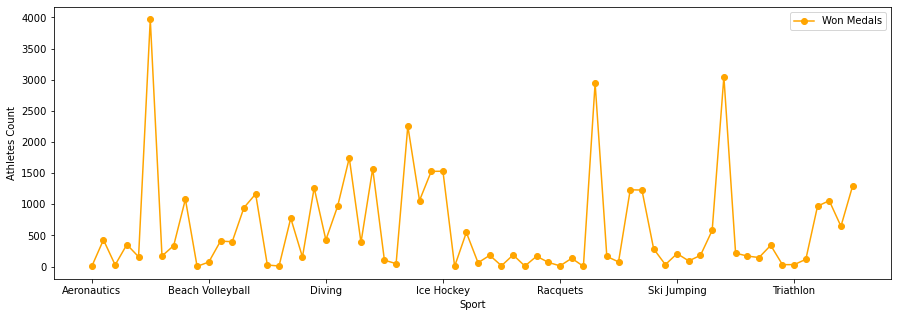

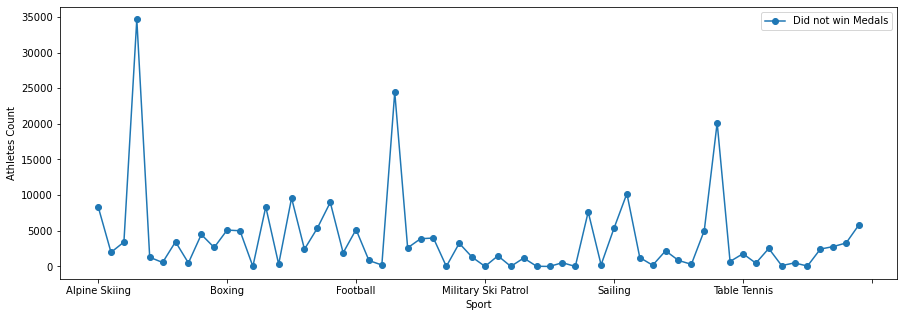

In [64]:
plt.figure()
sport_group_M.plot(ylabel = 'Athletes Count', figsize=(15,5), label = 'Won Medals', style='o-', color='orange')
plt.legend();
plt.figure()
sport_group_NM.plot(ylabel = 'Athletes Count', figsize=(15,5), label = 'Did not win Medals', style='o-')
plt.legend();

## Miscellaneous :

Some functions that were created while solving this problem but ended up being discarded.
Best to be kept as they might be useful for some future use cases

In [65]:
# Creating a linear regression function
def linear_regression(Xs:[], Ys:[]) -> ():
    '''
    Makes a Simple Linear Regression from a set of (Xi,Yi) pairs 
    
    Parameters:
    -----------
    Xs: array of x independent values
    Ys: array of y dependent values
    -----------
    
    Return:
    -------
    r: Person's Correlation Coefficient
    a: The slope in the linear regression
    b: The Y-Intercept of the linear regression
    -------
    '''
    # calcul person's r
    r = np.sum((Xs - Xs.mean()) * (Ys - Ys.mean())) / np.sqrt(np.sum((Xs-Xs.mean())**2) * np.sum((Ys-Ys.mean())**2))
    # calcul slope
    a = r * (Ys.std() / Xs.std())
    # calcul intercept
    b = Ys.mean() - a*Xs.mean()
    #return y values
    return r, a, b